<a href="https://colab.research.google.com/github/Yasamin-Khorshidi/Linear_Control_4031/blob/main/Assignment/AI_1/A2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
# آ
!pip install gdown
import gdown
import scipy.io

url = 'https://engineering.case.edu/sites/default/files/125.mat'
output = 'data.mat'
gdown.download(url, output, quiet=False)
mat_data = scipy.io.loadmat('data.mat')

print(mat_data.keys())
#print(data['X125_FE_time'])
#print(data['__globals__'])
#print(data['X125_DE_time'])

data = mat_data['X125_FE_time']
data = data.flatten()

Downloading...
From: https://engineering.case.edu/sites/default/files/125.mat
To: /content/data.mat
100%|██████████| 7.82M/7.82M [00:00<00:00, 15.3MB/s]

dict_keys(['__header__', '__version__', '__globals__', 'X125_DE_time', 'X125_FE_time', 'X125RPM'])


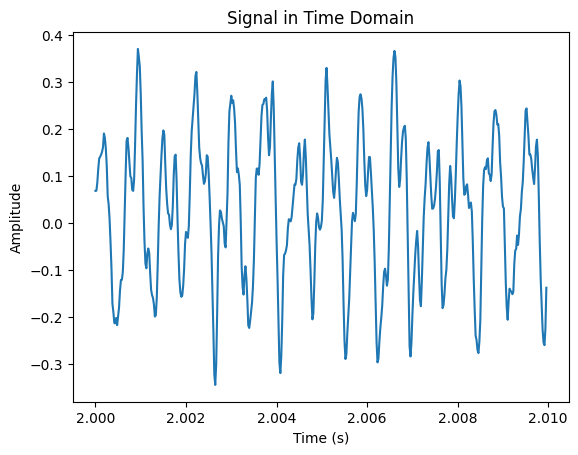

In [141]:
# ب
import matplotlib.pyplot as plt
import numpy as np

fs = 48000
time = np.arange(len(data)) / fs
start_time = 2
end_time = 2.01
start_index = int(start_time * fs)
end_index = int(end_time * fs)

plt.plot(time[start_index:end_index], data[start_index:end_index])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal in Time Domain')
plt.show()


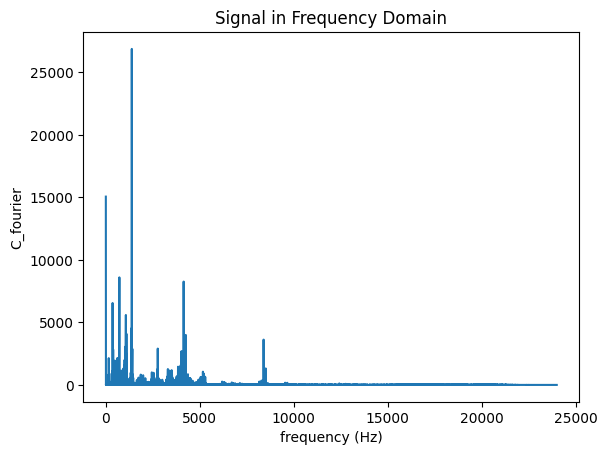

In [142]:
# ج
def plot_fft(data, fs):
    fft = np.fft.fft(data)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, fs, len(data))

    plt.plot(frequency[:len(frequency)//2], magnitude[:len(magnitude)//2])
    plt.xlabel('frequency (Hz)')
    plt.ylabel('C_fourier')
    plt.title('Signal in Frequency Domain')
    plt.show()

plot_fft(data, fs)

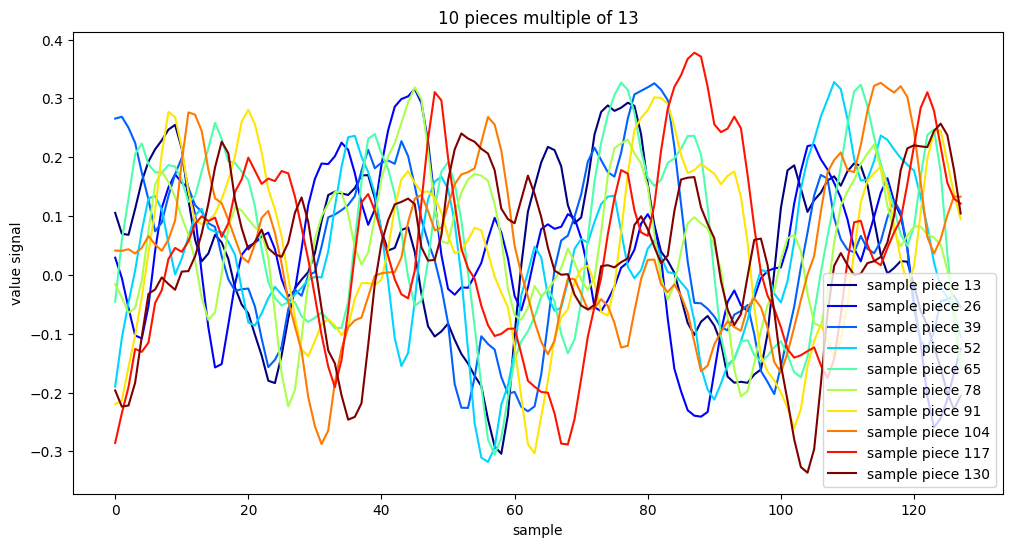

In [143]:
# د _ ه
def segment_signal(data, segment_size, overlap):
    segments = []
    start = 0
    while start + segment_size <= len(data):
        segments.append(data[start:start + segment_size])
        start += (segment_size - overlap)
    return np.array(segments)

segment_size = 128
overlap = 64
segments = segment_signal(data, segment_size, overlap)

import pandas as pd

df = pd.DataFrame(segments)

plt.figure(figsize=(12, 6))
colors = plt.cm.jet(np.linspace(0, 1, 10))

for i in range(10):
    segment_index = (i + 1) * 13
    if segment_index < len(df):
        plt.plot(df.iloc[segment_index], color=colors[i], label=f'sample piece {segment_index}')

plt.xlabel('sample')
plt.ylabel('value signal')
plt.title('10 pieces multiple of 13')
plt.legend()
plt.show()



In [144]:
# ,
def extract_features(data):
    mean = np.mean(data)
    std = np.std(data)
    rms = np.sqrt(np.mean(data**2))

    return {'averange': mean, 'standard deviation ': std, 'squre averange root ': rms}


features = []
for i in range(len(df)):
    segment = df.iloc[i].values
    feature = extract_features(segment)
    features.append(feature)

features_df = pd.DataFrame(features)

features_df.to_csv('features.csv', index=False)


